In [8]:
from pathlib import Path
import fitz # install using: pip install PyMuPDF
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
pdf_path = Path("/home/xbankov/COP_analysis/data/pdf")

In [10]:
pdfs = list(pdf_path.glob('*.pdf'))

In [11]:
def open_pdf(filename):
    with fitz.open(filename) as doc:
        text = ""
        for page in doc:
            text += page.get_text()

    return text

In [6]:
texts = list(map(open_pdf, pdfs))

In [7]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

model.safetensors: 100%|██████████| 1.63G/1.63G [00:23<00:00, 68.7MB/s]
generation_config.json: 100%|██████████| 363/363 [00:00<00:00, 1.53MB/s]
vocab.json: 100%|██████████| 899k/899k [00:00<00:00, 9.28MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 2.29MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 42.2MB/s]


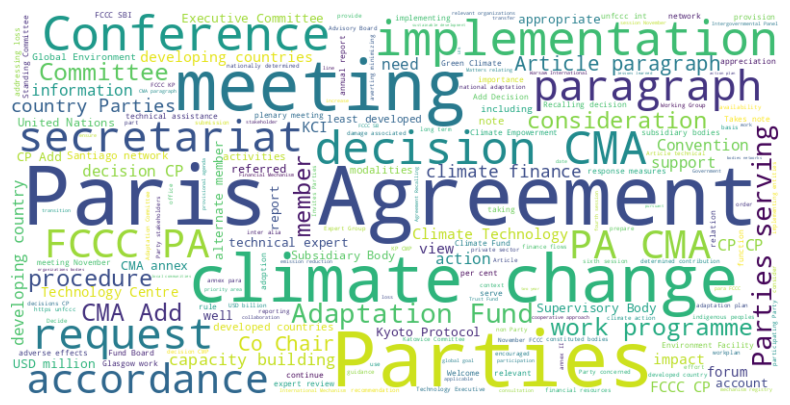

In [13]:
# Combine the documents into a single string
text = ' '.join(texts)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()